# Objectif 

- Déployer la méthodologie vue pour la régression  en classification
- Utiliser le dataset `digits` 

# Mise en place

In [1]:
from rich import print
from rich.table import Table
from rich_rst import RestructuredText as RST

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import (
    load_iris, 
    load_digits,
    fetch_lfw_people,
    load_lfw_people,
)


ImportError: cannot import name 'load_lfw_people' from 'sklearn.datasets' (C:\Users\Moi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\datasets\__init__.py)

In [4]:
from sklearn.dummy import DummyClassifier

In [6]:
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [8]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
)

In [9]:
resultats = dict()

# Prise en main du dataset Digits

In [10]:
dataset = load_digits()
type(dataset)

sklearn.utils.Bunch

## Description

In [11]:
print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    📅 July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is an integer in the range
0..16. This reduces dimensionality and gives invariance to small
distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G.
T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C.
L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469,
1994.

.. topic:: References

  - C. Kaynak (1995) Methods of Combining Multiple Classifiers and Their
    Applications to Handwritten Digit Recognition, MSc Thesis, Institute of
    Graduate Studies in Science and Engineering, Bogazici University.
  - E. Alpaydin, C. Kaynak (1998) Cascading Classifiers, Kybernetika.
  - Ken Tang and Ponnuthurai N. Suganthan and Xi Yao and A. Kai Qin.
    Linear dimensionalityreduction using relevance weighted LDA. School of
    Electrical and Electronic Engineering Nanyang Technological University.
    2005.
  - Claudio Gentile. A New Approximate Maximal Margin Classification
    Algorithm. NIPS. 2000.

In [12]:
print(RST(dataset.DESCR))

╔═══════════════════════════════════════════════════════════════════════════════════════════╗
║                     Optical recognition of handwritten digits dataset                     ║
╚═══════════════════════════════════════════════════════════════════════════════════════════╝
Data Set Characteristics:

Number of Instances1797

Number of Attributes64

Attribute Information8x8 image of integer pixels in the range 0..16.

Missing Attribute ValuesNone

Creator1. Alpaydin (alpaydin '@' boun.edu.tr)

Enumerated list start value not ordinal-1: "E" (ordinal 5)

DateJuly; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is an integer in the range
0..16. This reduces dimensionality and gives invariance to small
distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G.
T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C.
L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469,
1994.

╔═══════════════════════════════════════════════════════════════════════════════════════════╗
║                                        References                                         ║
╚═══════════════════════════════════════════════════════════════════════════════════════════╝
 • C. Kaynak (1995) Methods of Combining Multiple Classifiers and Their
Applications to Handwritten Digit Recognition, MSc Thesis, Institute of
Graduate Studies in Science and Engineering, Bogazici University.
 • Alpaydin, C. Kaynak (1998) Cascading Classifiers, Kybernetika.

<string>:4: (INFO/1) Enumerated list start value not ordinal-1: "E" (ordinal 5)
 • Ken Tang and Ponnuthurai N. Suganthan and Xi Yao and A. Kai Qin.
Linear dimensionalityreduction using relevance weighted LDA. School of
Electrical and Electronic Engineering Nanyang Technological University.
2005.
 • Claudio Gentile. A New Approximate Maximal Margin Classification
Algorithm. NIPS. 2000.

## Récupération des données numériques

In [19]:
X = dataset.data
X.shape

(1797, 64)

In [16]:
y = dataset.target
y

array([0, 1, 2, ..., 8, 9, 8])

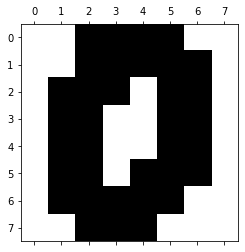

In [20]:
plt.spy(X[0].reshape((8,8)))

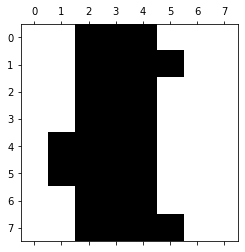

In [21]:
plt.spy(X[99].reshape((8,8)))

In [17]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

## Visualisation

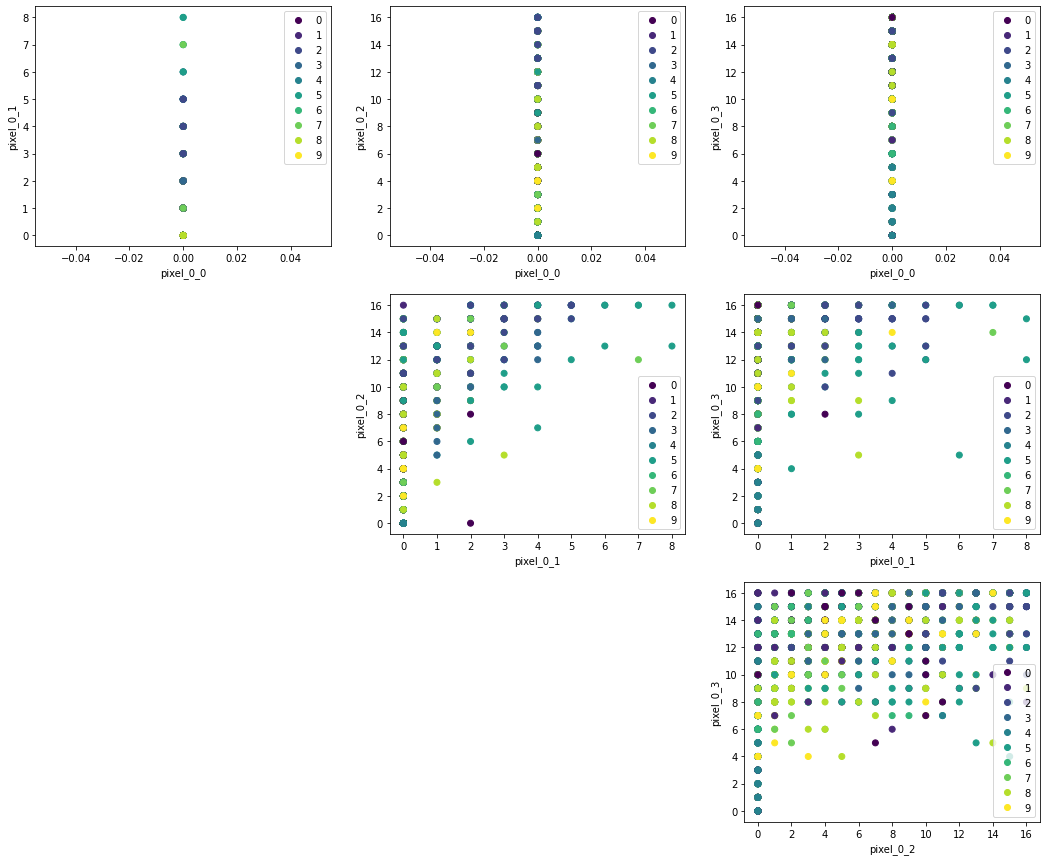

In [18]:
fig, reps = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
for i in range(4):
    for j in range(4):
        if i < j:
            nuage = reps[i,j-1].scatter(X[:, i], X[:, j], c=y)
            couleurs, _= nuage.legend_elements()
            reps[i,j-1].set_xlabel(dataset.feature_names[i])
            reps[i,j-1].set_ylabel(dataset.feature_names[j])
            reps[i,j-1].legend(couleurs, dataset.target_names)

reps[1, 0].axis("off")
reps[2, 0].axis("off")
reps[2, 1].axis("off");

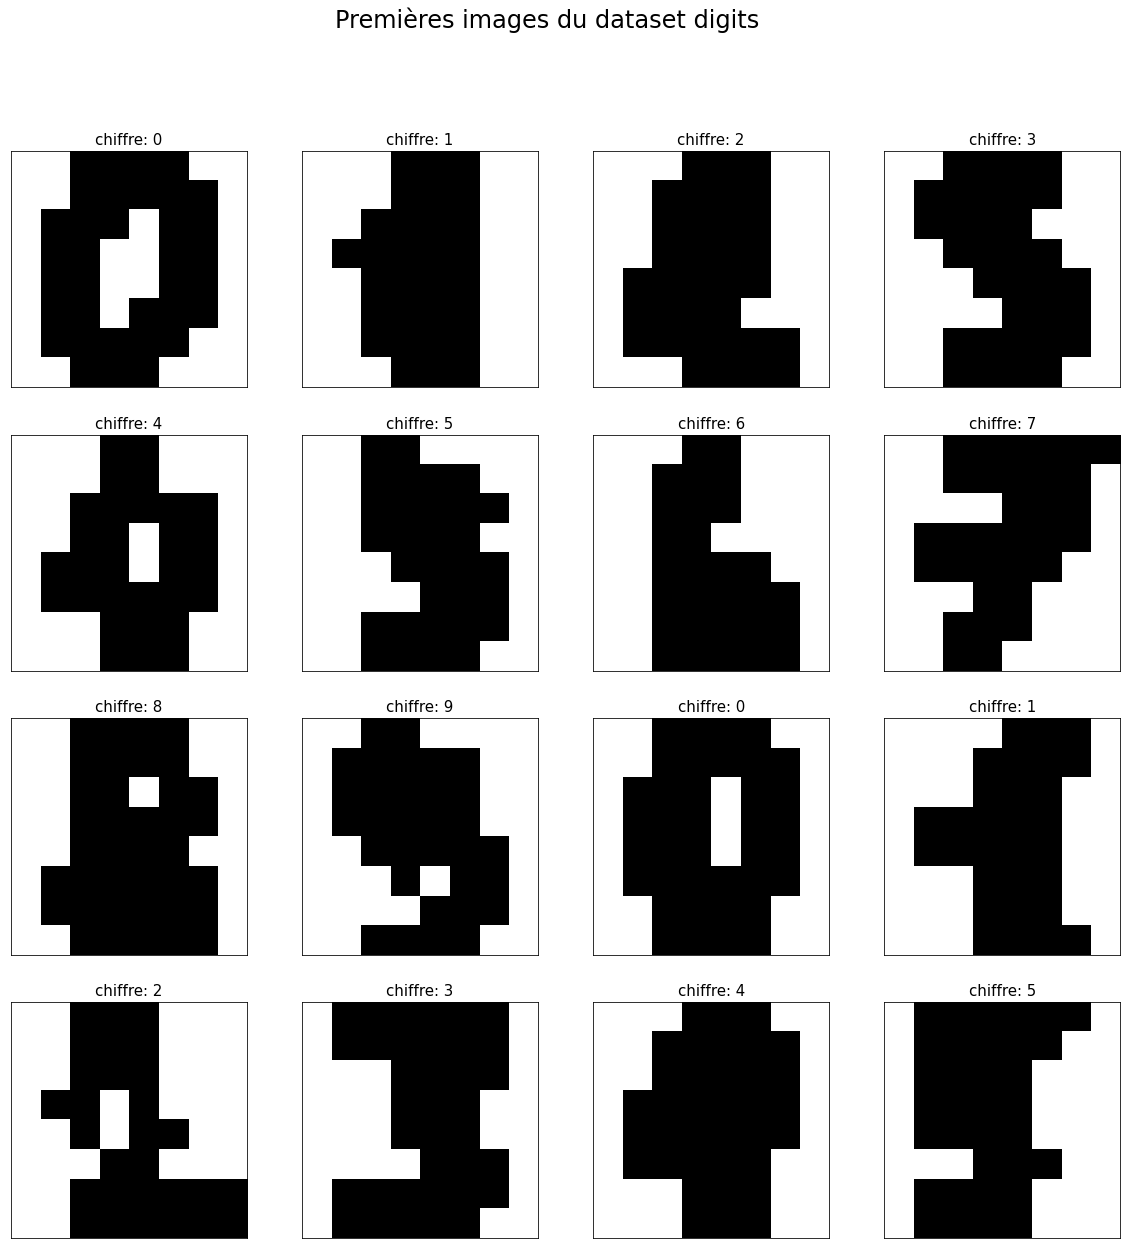

In [22]:
fig, reps = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.suptitle("Premières images du dataset digits", fontsize=24)
for i, rep in enumerate(reps.flatten()):
    rep.spy(X[i].reshape((8,8)))
    rep.set_xticks([])
    rep.set_yticks([])
    rep.set_title(f"chiffre: {y[i]}", fontsize=15)

## Modèle élémentaires

In [23]:
c = LogisticRegression()

In [24]:
c.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [28]:
%%time
g = GridSearchCV(
    estimator = c,
    param_grid= {
        "C" : [0.1, 1., 10, 100],
        "max_iter": [500,]
    }
)
g.fit(X_tr, y_tr)

C:\Users\Moi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Moi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Wall time: 26.6 s


C:\Users\Moi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10, 100], 'max_iter': [500]})

In [29]:
c = KNeighborsClassifier()
c.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [30]:
%%time
g = GridSearchCV(
    estimator=c,
    param_grid={
        "n_neighbors": [3, 5, 7, 9],
    }
)
g.fit(X_tr, y_tr)

Wall time: 681 ms


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [32]:
resultats[g] = g.best_score_
resultats[g]

0.9821781632934048

In [33]:
c = GaussianNB()
c.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [34]:
%%time
score = cross_val_score(c, X_tr, y_tr)
resultats[c] = np.mean(score)

Wall time: 46.8 ms


In [35]:
c = DecisionTreeClassifier()
c.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [36]:
%time
score = cross_val_score(c, X_tr, y_tr)
resultats[c] = np.mean(score)

Wall time: 1 ms


In [37]:
# Résultat moins élémentaires 
resume = Table()
resume.add_column("Score")
resume.add_column("Modele")
resume.add_column("Meilleur choix de Paramètres")
for score, modele in sorted(
    [(score, modele) for modele, score in resultats.items()], 
    key=lambda x: x[0]
):
    try:
        mod_str = str(modele.best_estimator_)
        resume.add_row(str(score), mod_str[:mod_str.find("(")], str(modele.best_params_))
    except AttributeError:
        mod_str = str(modele)
        resume.add_row(str(score), mod_str[:mod_str.find("(")], "")
print(resume)

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Score              ┃ Modele                 ┃ Meilleur choix de Paramètres ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0.8337216026435357 │ DecisionTreeClassifier │                              │
│ 0.8396585433016659 │ GaussianNB             │                              │
│ 0.9821781632934048 │ KNeighborsClassifier   │ {'n_neighbors': 3}           │
└────────────────────┴────────────────────────┴──────────────────────────────┘

## Modèles moins élémentaires

In [38]:
c = RandomForestClassifier()
c.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
%%time
g = GridSearchCV(
    estimator=c,
    param_grid={
        "n_estimators": [50, 100, 150, 200],
    }
)
g.fit(X_tr, y_tr);

Wall time: 15.1 s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200]})

In [40]:
resultats[g] = g.best_score_

In [41]:
c = MLPClassifier()
c.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [42]:
%%time
g = GridSearchCV(
    estimator=c,
    param_grid={
        "hidden_layer_sizes": [(200, ), (100, 100), (50, 100, 50), (25, 75, 75, 25)],
        "max_iter": [1000,],
    }
)
g.fit(X_tr, y_tr);

Wall time: 41.9 s


GridSearchCV(estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(200,), (100, 100),
                                                (50, 100, 50),
                                                (25, 75, 75, 25)],
                         'max_iter': [1000]})

In [43]:
resultats[g] = g.best_score_

In [44]:
c = SVC()
c.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [45]:
%%time
g = GridSearchCV(
    estimator=c,
    param_grid={
        "C": [0.1 * 2 ** j for j in range(10)],
    }
)
g.fit(X_tr, y_tr);

Wall time: 6.51 s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6,
                               51.2]})

In [46]:
resultats[g] = g.best_score_

## Conclusion

In [47]:
resume = Table()
resume.add_column("Score")
resume.add_column("Modele")
resume.add_column("Meilleur choix de Paramètres")
for score, modele in sorted(
    [(score, modele) for modele, score in resultats.items()], 
    key=lambda x: x[0]
):
    try:
        mod_str = str(modele.best_estimator_)
        resume.add_row(str(score), mod_str[:mod_str.find("(")], str(modele.best_params_))
    except AttributeError:
        mod_str = str(modele)
        resume.add_row(str(score), mod_str[:mod_str.find("(")], "")
print(resume)

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Score              ┃ Modele                 ┃ Meilleur choix de Paramètres                ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0.8337216026435357 │ DecisionTreeClassifier │                                             │
│ 0.8396585433016659 │ GaussianNB             │                                             │
│ 0.9717940245077792 │ RandomForestClassifier │ {'n_estimators': 100}                       │
│ 0.975500481894534  │ MLPClassifier          │ {'hidden_layer_sizes': (200,), 'max_iter':  │
│                    │                        │ 1000}                                       │
│ 0.9821781632934048 │ KNeighborsClassifier   │ {'n_neighbors': 3}                          │
│ 0.9873771168938454 │ SVC                    │ {'C': 6.4}                                  │
└────────────────────┴────────────────────────┴─────────────────────────────────────────────┘

In [48]:
meilleur_score = max(resultats.values())
meilleur_modele, *_ = [
    modele for modele, score in resultats.items() if score == meilleur_score
]    

In [49]:
print("Meilleur modèle: ", meilleur_modele.best_estimator_)
print("De paramètres: ", meilleur_modele.best_params_)
print("Score de crossvalidation: ", meilleur_modele.best_score_)

Meilleur modèle:  SVC(C=6.4)

De paramètres: 
{'C': 6.4}

Score de crossvalidation:  0.9873771168938454

In [50]:
meilleur_modele.fit(X_tr, y_tr)
meilleur_modele.score(X_tr, y_tr)

1.0

In [51]:
meilleur_modele.score(X_te, y_te)

0.9955555555555555

In [52]:
meilleur_modele.best_params_

{'C': 6.4}

In [53]:
cm_tr = confusion_matrix(y_tr, meilleur_modele.predict(X_tr))
cm_tr

array([[119,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 142,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 140,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 134,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 135,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 140,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 126,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 141,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 134,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 136]], dtype=int64)

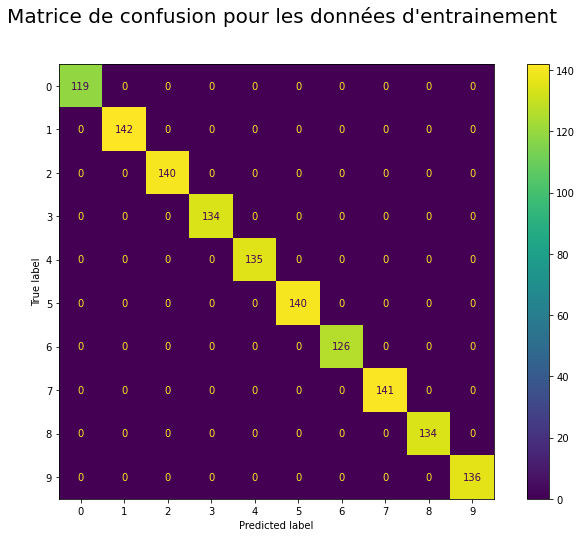

In [54]:
fig, rep = plt.subplots(figsize=(12, 8))
ConfusionMatrixDisplay(cm_tr, display_labels=meilleur_modele.classes_).plot(ax=rep);
fig.suptitle("Matrice de confusion pour les données d'entrainement", fontsize=20);

In [55]:
cm_te = confusion_matrix(y_te, meilleur_modele.predict(X_te))
cm_te

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 43]], dtype=int64)

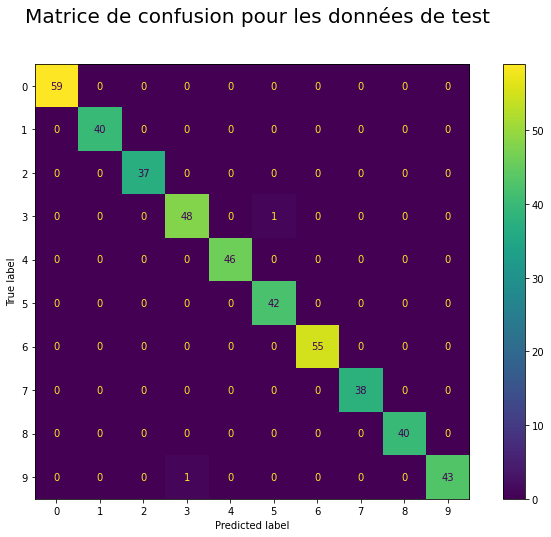

In [56]:
fig, rep = plt.subplots(figsize=(12, 8))
ConfusionMatrixDisplay(cm_te, display_labels=meilleur_modele.classes_).plot(ax=rep)
fig.suptitle("Matrice de confusion pour les données de test", fontsize=20);